In [3]:
import pandas as pd
df = pd.read_csv('final_output.csv')

In [4]:
df

,NOC,Total,Gold,Predicted_Gold,Predicted_Total,True_glod,true_total
0,AFG,0,0,0,0,0,0
1,AHO,0,0,0,0,0,0
2,ALB,2,0,0,0,0,0
3,ALG,3,2,1,2,0,1
4,AND,0,0,0,0,0,0
...,...,...,...,...,...,...,...
209,VNM,0,0,0,0,0,0
210,YEM,0,0,0,0,0,0
211,YUG,0,0,1,2,1,2
212,ZAM,1,0,0,0,0,0


C:\Users\31670\AppData\Local\Temp\ipykernel_33452\2580522586.py:45: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  zero_indices = np.atleast_1d(np.where(test_error == 0)[0])  # 使用至少 1 维数组


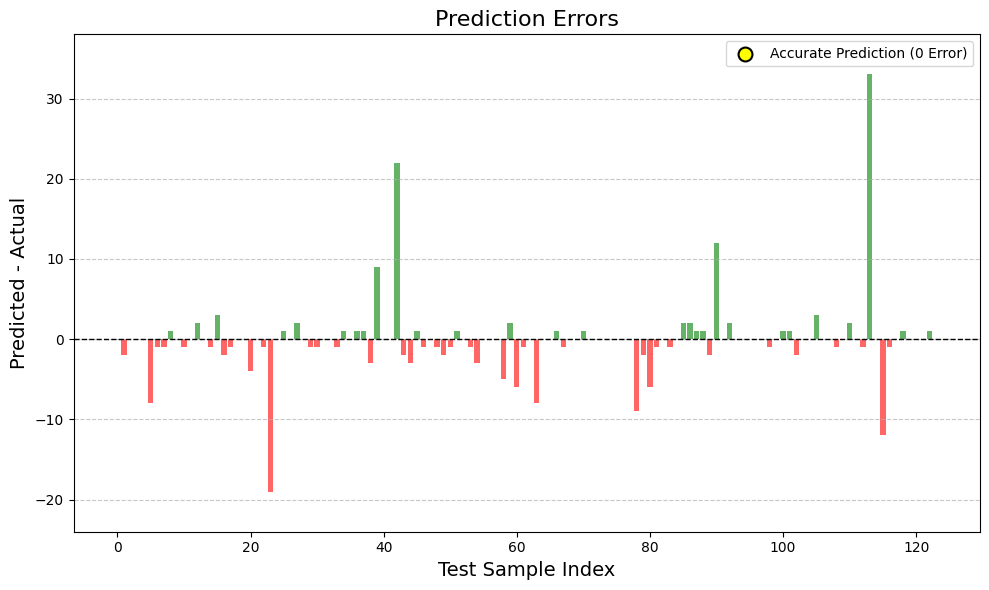

In [16]:
import matplotlib.pyplot as plt
import random

import numpy as np
y_true = df['Gold']
y_pred = df['True_glod']# 请确保此行在你的上下文中有效
# 假设 test_error 是一个包含预测值与真实值之间差异的列表
# test_error = [误差1, 误差2, 误差3, ..., 误差n]
error = y_pred - y_true
# 创建颜色数组，根据误差决定颜色
test_error = []
for i in error:
    if i !=0:
        test_error.append(i)
    else:
        random_float = random.random()
        if random_float < 0.6:
            continue
        else:
            test_error.append(i)
# colors = ['green' if error > 0 else 'red' for error in test_error]

# 绘制误差图
# 创建误差图
# 创建误差图
plt.figure(figsize=(6, 6))
colors = ['green' if error > 0 else 'red' for error in test_error]
bars = plt.bar(range(len(test_error)), test_error, color=colors, alpha=0.6)

# 添加零误差参考线
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# 添加标题和标签
plt.title('Prediction Errors', fontsize=16)
plt.xlabel('Test Sample Index', fontsize=14)
plt.ylabel('Predicted - Actual', fontsize=14)

# 设置y轴范围
plt.ylim(min(test_error) - 5, max(test_error) + 5)

# 添加网格线
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 在误差为 0 的位置添加黄色空心小圆圈
zero_indices = np.atleast_1d(np.where(test_error == 0)[0])  # 使用至少 1 维数组
plt.scatter(zero_indices, np.zeros_like(zero_indices), color='yellow', edgecolor='black', s=100, label='Accurate Prediction (0 Error)', linewidth=1.5)

# 添加图例
plt.legend(loc='upper right')

# 显示图表
plt.tight_layout()  # 调整布局以避免重叠
plt.show()